**IMPORT** GENERAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

**READ** IN CSV FILES

In [2]:
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

<div style = "text-align:center; font-size: 48px; font-weight: bold;"> EDA </div>

GENERAL **INFO** ON EVERY DATAFRAME

In [3]:
print('\n LINKS DataFrame Info:')
links_df.info() 

print('\n MOVIES DataFrame Info:')
movies_df.info()

print('\n RATINGS Dataframe Info:')
ratings_df.info()

print('\n TAGS Dataframe Info:')
tags_df.info()


 LINKS DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB

 MOVIES DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

 RATINGS Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 

LOOK AT **RANDOM SAMPLES** OF DATAFRAMES

In [4]:
def df_randomsamples(sample_size = 5, random_state = None, **dfs):
    '''
    Get side-by-side random samples from multiple DataFrames.
    
    Parameters:
        sample_size (int): Number of rows to sample from each DataFrame. Default = 5.
        random_state (int): Seed for random sampling. Default = None. 
        **dfs (pd.DataFrame): Keyword arguments where the key is the DataFrame name and the value is the DataFrame itself.
    Returns:
        pd.Dataframe: A DataFrame containing side-by-side random samples from each input DataFrame.
    '''
    random_samples = [(df_name, df.sample(n=sample_size, random_state=random_state)) for df_name, df in dfs.items()]
    
    # Display sampled DataFrames side by side
    for df_name, sampled_df in random_samples:
        print(f"DataFrame: {df_name}")
        display(sampled_df)


In [5]:
df_randomsamples(sample_size = 5, random_state = 42, tags_df = tags_df, movies_df = movies_df, ratings_df = ratings_df, links_df = links_df)

DataFrame: tags_df


,userId,movieId,tag,timestamp
2023,474,5644,baseball,1138039381
2587,477,4226,twist ending,1256051079
3222,567,112852,unlikely hero,1525285378
1263,474,1028,Disney,1137375815
781,424,1258,atmospheric,1457843344


DataFrame: movies_df


,movieId,title,genres
6213,45635,"Notorious Bettie Page, The (2005)",Drama
1056,1373,Star Trek V: The Final Frontier (1989),Action|Sci-Fi
4891,7325,Starsky & Hutch (2004),Action|Comedy|Crime|Thriller
346,389,"Colonel Chabert, Le (1994)",Drama|Romance|War
5353,8920,"Country Girl, The (1954)",Drama


DataFrame: ratings_df


,userId,movieId,rating,timestamp
67037,432,77866,4.5,1335139641
42175,288,474,3.0,978465565
93850,599,4351,3.0,1498524542
6187,42,2987,4.0,996262677
12229,75,1610,4.0,1158989841


DataFrame: links_df


,movieId,imdbId,tmdbId
6213,45635,404802,15402.0
1056,1373,98382,172.0
4891,7325,335438,9384.0
346,389,109454,41580.0
5353,8920,46874,2438.0


In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<div style = "text-align:center; font-size: 48px; font-weight: bold;"> GENERAL DATA PREPROCESSING </div>
<div style = "text-align:center; font-size: 24px; font-weight: normal;"> DATA TRANSFORMATION </div>

### We see that the 'genres' column in the 'movies_df' dataframe contains multiple genres for each movie, separated by the '|' character. 

So we will **split the genres** accordingly. 

In [7]:
# Function that splits the combined genres
def split_genres(genre_string):
    return genre_string.split('|')

In [8]:
# Apply the function to the 'genres' column to create a new column with a list of individual genres for each movie
movies_df['individual_genres'] = movies_df['genres'].apply(split_genres)

In [9]:
movies_df.head()

,movieId,title,genres,individual_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


**Encode** the genres:

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Use fit_transform to binary encode the individual genres
binary_encoded_genres = mlb.fit_transform(movies_df['individual_genres'])

# Create a DataFrame from the binary encoded genres
binary_encoded_df = pd.DataFrame(binary_encoded_genres, columns = mlb.classes_)

# Concatenate the binary encoded DataFrame with the original 'movies_df'
movies_df = pd.concat([movies_df, binary_encoded_df], axis = 1)

# Drop the 'genres' and 'individual_genres' columns 
movies_df.drop(['genres', 'individual_genres'], axis = 1, inplace = True)



In [11]:
movies_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**MERGE** MOVIE AND RATING DATAFRAMES

In [12]:
# Merge movies_df with ratings_df on 'movieID' column 
merged_df = movies_df.merge(ratings_df, on = 'movieId', how = 'inner')

In [13]:
merged_df

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,184,3.5,1537109545
100833,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,184,3.5,1537110021


Now that we have a consolidated dataframe, let's continue with the EDA.

<div style = "text-align:center; font-size: 48px; font-weight: bold;"> EDA CONTINUED </div>

In [14]:
merged_df.describe()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,...,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,0.000466,0.303810,0.239607,0.069301,0.091317,0.387292,0.165427,0.012089,0.415804,...,0.041037,0.076104,0.179737,0.171000,0.262327,0.048187,0.019140,326.127564,3.501557,1.205946e+09
std,35530.987199,0.021585,0.459904,0.426846,0.253966,0.288060,0.487134,0.371567,0.109284,0.492862,...,0.198377,0.265165,0.383970,0.376511,0.439902,0.214163,0.137018,182.618491,1.042529,2.162610e+08
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,610.000000,5.000000,1.537799e+09


Note that **mean** represents the proportion of movies that have that particular genre. For example, the 'Action' genre/column has a mean of 0.303810, indicating that approximately 30.38% of movies in this dataset have the 'Action genre.



### **GENRES** ANALYSIS

In [15]:
# Analyze the popularity of different genres by counting their occurences, in order from most to least
genre_counts = merged_df.iloc[:, 3:-3].sum().sort_values(ascending = False)
genre_counts 

Drama          41928
Comedy         39053
Action         30635
Thriller       26452
Adventure      24161
Romance        18124
Sci-Fi         17243
Crime          16681
Fantasy        11834
Children        9208
Mystery         7674
Horror          7291
Animation       6988
War             4859
IMAX            4145
Musical         4138
Western         1930
Documentary     1219
Film-Noir        870
dtype: int64

In [16]:
top_5_genres = genre_counts.head(5).index.tolist() 
top_5_genres

['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']

### **RATING DISTRIBUTION** FOR THE **FIVE MOST FREQUENT GENRES** IN THIS DATASET

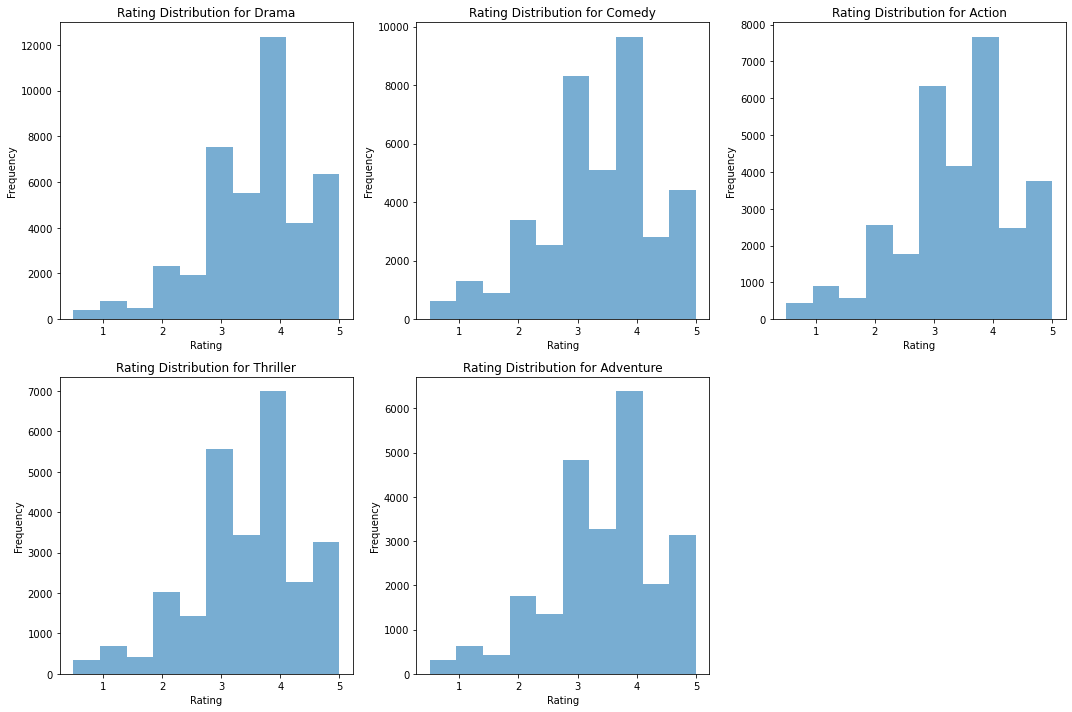

In [17]:
# Filter the data to include only movies with the top 5 genres
filtered_df = merged_df[merged_df[top_5_genres].any(axis = 1)]

# Plot rating distribution for each genre
plt.figure(figsize=(15, 10))

for i, genre in enumerate(top_5_genres, 1):
    plt.subplot(2, 3, i)
    genre_ratings = filtered_df[filtered_df[genre] == 1]['rating']
    plt.hist(genre_ratings, bins=10, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Rating Distribution for {genre}')
    plt.tight_layout()

plt.show()

### NUMBER OF **RATINGS PER MOVIE**

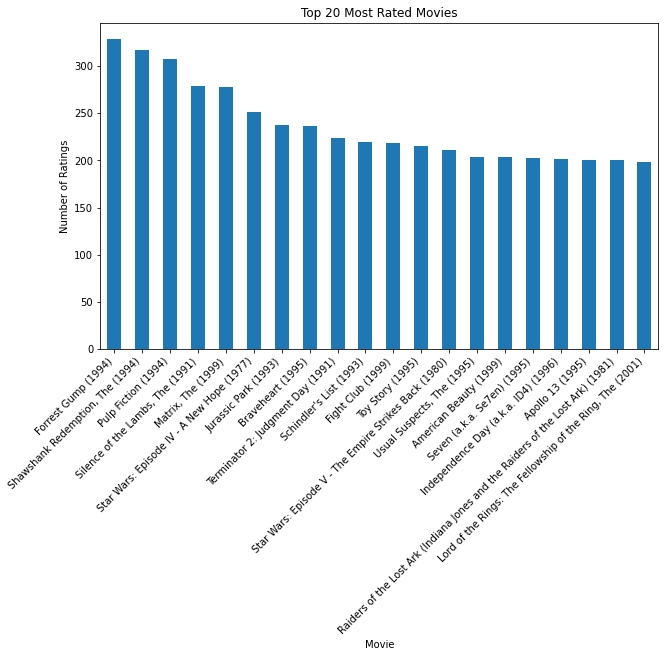

In [18]:
rating_counts = merged_df.groupby('title')['rating'].count()
plt.figure(figsize=(10, 6))
rating_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Most Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
merged_df

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,184,3.5,1537109545
100833,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,184,3.5,1537110021


<div style = "text-align:center; font-size: 48px; font-weight: bold;"> CONTENT-BASED RECOMMENDATION SYSTEM </div>
<div style = "text-align:center; font-size: 36px; font-weight: normal;"> FOR EXISTING USERS </div>
<br> 
<div style = "text-align:center; font-size: 24px; font-weight: normal;"> FEATURE ENGINEERING </div>

For content-based filtering systems, we first need to perform some sort of **data reduction**, because we are primarily focusing on the *features of the items*, which are movies in this case, to make recommendations. 

Note: Conversely, if we are doing collaborative-based filtering systems, we can use the *raw user-item interaction data* (user ratings) directly because the collaborative filtering system leverages these ratings to find similarities between users or items.

In [20]:
# Make a copy of 'merged_df'
movie_profiles = merged_df.copy() 


In a content-based recommendation system, the primary focus is on using the content-related features of items (in this case, movies) to make recommendations. These content-related features can be genres, tags, descriptions, actors, directors, etc. The goal is to find similarities between different items based on their content characteristics.

However, including user ratings in the content-based recommendation system can serve two purposes:

1. Personalization: By incorporating user ratings, we can still personalize the recommendations based on a specific user's preferences. **For example**, if two movies have similar genres and content features, but one has higher average ratings from users with similar taste as the target user, we might want to prioritize that movie in the recommendations.

2. Quality Assurance: User ratings can act as a measure of the overall quality or popularity of a movie. Higher-rated movies might be perceived as more enjoyable by a broader audience, and including this information can help in filtering out less popular or less well-received movies from the recommendations.

perform **data reduction** by aggregating the ratings by calculating the mean rating of movies:

In [21]:
# Group by 'movieId' and calculate the AVERAGE rating for each movie
average_ratings = movie_profiles.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns = {'rating': 'average_rating'}, inplace = True)

# Merge 'average_ratings' with the 'movie_profiles' DataFrame
movie_profiles_with_avg = movie_profiles.merge(average_ratings, on = 'movieId', how = 'left')

# Scale the average rating to a common scale (e.g., from 0 to 5) using min-max scaling
max_rating = movie_profiles_with_avg['rating'].max()
min_rating = movie_profiles_with_avg['rating'].min()
movie_profiles_with_avg['scaled_avg_rating'] = (movie_profiles_with_avg['average_rating'] - min_rating) / (max_rating - min_rating) * 5

# Drop duplicate rows based on 'movieId' and keep the first occurrence (retains average rating)
movie_profiles_with_avg = movie_profiles_with_avg.drop_duplicates(subset = 'movieId', keep = 'first')

movie_profiles_with_avg

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp,average_rating,scaled_avg_rating
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,4.0,964982703,3.920930,3.801034
215,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,6,4.0,845553522,3.431818,3.257576
325,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,4.0,964981247,3.259615,3.066239
377,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,1,0,0,0,0,6,3.0,845554349,2.357143,2.063492
384,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,6,5.0,845553938,3.071429,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,184,4.0,1537109082,4.000000,3.888889
100832,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,184,3.5,1537109545,3.500000,3.333333
100833,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,184,3.5,1537109805,3.500000,3.333333
100834,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,184,3.5,1537110021,3.500000,3.333333


In [22]:
movie_profiles_with_avg.columns.tolist()

['movieId',
 'title',
 '(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'userId',
 'rating',
 'timestamp',
 'average_rating',
 'scaled_avg_rating']

<div style = "text-align:center; font-size: 24px; font-weight: normal;"> CONTENT-BASED RECOMMENDATION SYSTEM FEATURE SELECTION </div>

In [23]:
# Select relevant features
selected_features = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
                     'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                     'War', 'Western', 'average_rating']

# Create the final feature set
X = movie_profiles_with_avg[selected_features]

X

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_rating
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.920930
215,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.431818
325,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.259615
377,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.357143
384,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.000000
100832,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.500000
100833,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.500000
100834,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.500000


<div style = "text-align:center; font-size: 24px; font-weight: normal;"> CONTENT-BASED RECOMMENDATION SYSTEM MODEL BUILDING </div>

For a content-based recommendation system, we can use various similarity metrics to measure the similarity between movies based on their features (in this case, genres and average rating). One commonly used similarity metric is the cosine similarity.

**Note**: in the context of content-based filtering and cosine similarity-based movie recommendations, *there is **no need** for a train-test split* as the model is not learning from user feedback, but instead using movie features to calculate similarity scores.

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(X, X)

# 2. Create a dictionary mapping movie titles to their indices
indices = pd.Series(movie_profiles_with_avg.index, index=movie_profiles_with_avg['title']).to_dict()

# 3. Create a function to get movie recommendations based on similarity 
def get_movie_recommendations(title, cosine_sim_matrix, indices):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with the input movie 
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))

    # Sort the movies based on similarity scores in descending order 
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    # Get the top 10 similar movies (excluding the input movie itself)
    top_similar_movies = sim_scores[1:11]

    # Get the movie indices and titles
    movie_indices = [i[0] for i in top_similar_movies]
    movie_titles = movie_profiles_with_avg['title'].iloc[movie_indices]

    return movie_titles 

In [35]:
# Get movie recommendations for a specific movie
movie_title = 'Toy Story (1995)'
recommendations = get_movie_recommendations(movie_title, cosine_sim, indices)

recommendations 

64009                                 Monsters, Inc. (2001)
51710                                    Toy Story 2 (1999)
59397                      Emperor's New Groove, The (2000)
100186                                         Moana (2016)
41657                                           Antz (1998)
93743     Asterix and the Vikings (Astérix et les Viking...
84986                                Shrek the Third (2007)
88747                        Tale of Despereaux, The (2008)
99046                              The Good Dinosaur (2015)
82265                                      Wild, The (2006)
Name: title, dtype: object